# Generative Adeversarial Network (GAN)

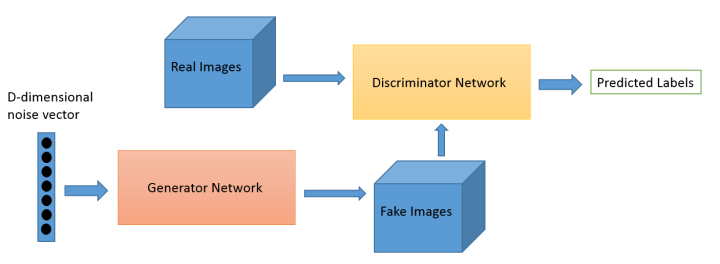

## Generator:
input for generator: A d-dim noise vector
output for generator: A fake images

## Discriminator:
input: a real images or a fake image
output: 1 if discriminator think input image is real, otherwise 0.

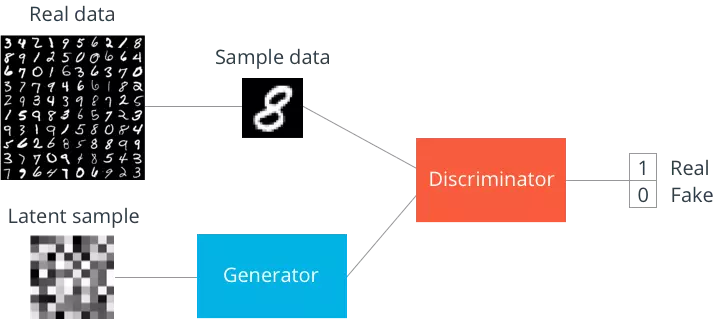

## MNIST

### Generator
- input: a d-dim noise vector
- output: a 28 * 28  image

### Discriminator
- input: a real image from mnist dataset or a fake image from generator
- output: 1 or 0

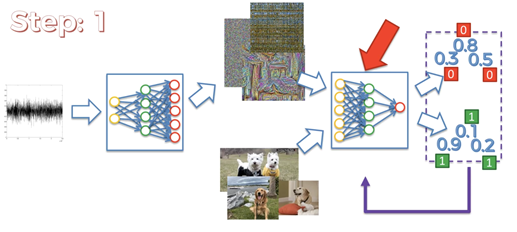

## Dog GAN process
 
input for generator: noise vector
outpur for generator: a 64 * 64 fake image

input for discriminator: fake image or a real dog image
output: probability of 1 and 0, argmax(p(1), p(0))

The error is calculated and these are backpropagated through the discriminator, where the weights are updated.

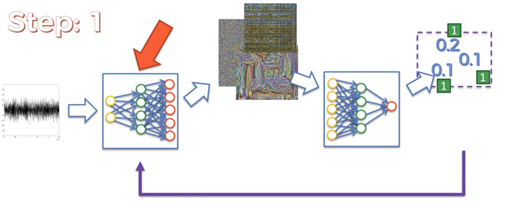

Next we train the generator. 

We take the batch of images that it created and put them through the discriminator again. We do not include the feature images. The generator learns by tricking the discriminator into it outputting false positives.

The discriminator will provide an output of probabilities. The values are then assessed and compared to what they should have been. 

Finally, The error is calculated and backpropagated through the generator and the weights are updated.

## Dog Images

### Image resizing
Since the requirement said "Your kernel's output must be called images.zip and contain 10,000 images sized **64x64**", thus we need to resize original picture to (64, 64)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as pltimg
from glob import glob
import os
%matplotlib inline

In [25]:
# create 64*64 min dog images directory
source_dir = "../dataset/generative-dog-images/all-dogs/"
target = "all-dogs-64-64"
original = 'all-dogs'
output_dir = source_dir.replace(original, target)
filenames = glob("{}/*".format(source_dir))

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
print("------image resizing------")
for file in filenames:
    with Image.open(file) as img:
        img.convert('RGB')
        resized_img = img.resize((64,64))
        output_dir = file.replace(original, target)
        resized_img.save(output_dir)

------image resizing------


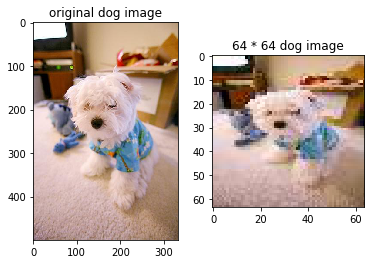

In [2]:
fig, ax = plt.subplots(1,2)
img = pltimg.imread('../dataset/generative-dog-images/all-dogs-64-64/n02085936_20610.jpg')
ax[1].imshow(img)
ax[1].set_title("64 * 64 dog image")

img1 = pltimg.imread("../dataset/generative-dog-images/all-dogs/n02085936_20610.jpg")
ax[0].imshow(img1)
ax[0].set_title("original dog image")
plt.show()

In [3]:
#define a function to read img file then return a (1, 12288) array
def read_file(filename):
    img = Image.open(filename)
    img.convert('RGB') #convert to RGB mode
    try:
        red, green, blue = img.split()
        
        red_arr = pltimg.pil_to_array(red)
        green_arr = pltimg.pil_to_array(green)
        blue_arr = pltimg.pil_to_array(blue)

        r_arr = red_arr.reshape(4096)
        g_arr = green_arr.reshape(4096)
        b_arr = blue_arr.reshape(4096)

        result = np.concatenate((r_arr, g_arr, b_arr))
        result = result.reshape((1,-1))
        return result

    except(ValueError):
        print(filename)

In [11]:
#define a function to read img file then return a (1, 12288) array
def read_file_mat(filename):
    img = pltimg.imread(filename)
    try:     
        result = img.reshape((1,-1))
        return result

    except(ValueError):
        print(filename)

In [15]:
res = read_file_mat("../dataset/generative-dog-images/all-dogs-64-64/n02085936_20610.jpg")

In [16]:
res.shape

(1, 12288)

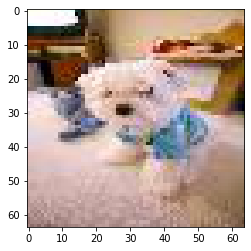

In [17]:
res = res.reshape((64, 64, 3))
plt.imshow(res)

## Problems
- There are pictures with more than one dog (even with 3 dogs);
- There are pictures with the dog (-s) and person (people);
- There are pictures with more than one person (even with 4 people);
- There are pictures where dogs occupy less than 1/5 of the picture;

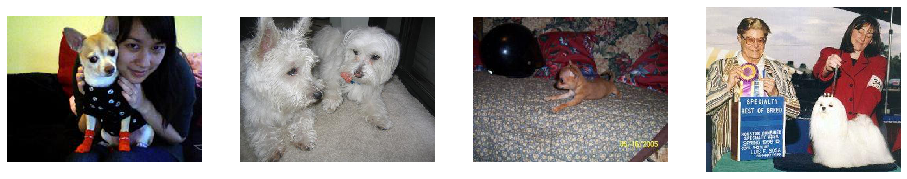

In [36]:
names = ['n02085620_7', 'n02085936_10610', 'n02085620_6399', 'n02085936_5067']
fig, ax = plt.subplots(1, 4, figsize=(16, 9))
for k,v in enumerate(names):
    
    img = pltimg.imread('../dataset/generative-dog-images/all-dogs/' + v + '.jpg')
    ax[k].imshow(img)
    ax[k].axis('off')
plt.show()

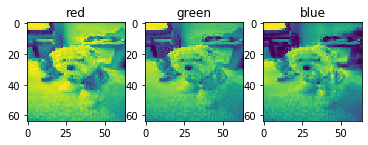

In [49]:
img = Image.open("../dataset/generative-dog-images/all-dogs-64-64/n02085936_20610.jpg")
red, green, blue = img.split()
red_arr = pltimg.pil_to_array(red)
green_arr = pltimg.pil_to_array(green)
blue_arr = pltimg.pil_to_array(blue)

r_arr = red_arr.reshape(4096)
g_arr = green_arr.reshape(4096)
b_arr = blue_arr.reshape(4096)

fig, ax = plt.subplots(1,3)
ax[1].imshow(g_arr.reshape((64,64)))
ax[1].set_title("green")

ax[0].imshow(r_arr.reshape((64, 64)))
ax[0].set_title("red")

ax[2].imshow(b_arr.reshape((64, 64)))
ax[2].set_title("blue")
plt.show()

In [52]:
# define genreator and discriminator in the network

In [53]:
# define loss function

In [54]:
# train model

In [55]:
# model iteration and accuracy

In [ ]:
#